In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [ ]:
dataset =pd.read_csv('IoT Network Intrusion Dataset.csv')
data = dataset.copy()
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [ ]:
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
print("Gözlem sayısı : " ,len(data))
print("Değişken sayısı : ", len(data.columns))

Gözlem sayısı :  625783
Değişken sayısı :  86


In [ ]:
#null and infinite value cleanup
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [ ]:
#removing unnecessary lines
data.drop(["Src_IP","Dst_IP","Src_Port","Dst_Port","Timestamp","Protocol","Flow_ID"],axis=1,inplace=True)

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Src_Port,625783.0,35026.156190,24721.047752,0.0,9020.0,51991.0,56361.000000,65500.000000
Dst_Port,625783.0,16387.027479,17550.363037,0.0,8899.0,9020.0,10101.000000,65371.000000
Protocol,625783.0,9.971436,5.379857,0.0,6.0,6.0,17.000000,17.000000
Flow_Duration,625783.0,635.422865,3496.740723,0.0,76.0,132.0,221.000000,99984.000000
Tot_Fwd_Pkts,625783.0,1.675566,4.309970,0.0,0.0,1.0,2.000000,186.000000
...,...,...,...,...,...,...,...,...
Active_Min,625783.0,3.462159,64.111043,0.0,0.0,0.0,0.000000,6659.000000
Idle_Mean,625783.0,502.503832,2112.957360,0.0,73.0,93.5,141.000000,99973.000000
Idle_Std,625783.0,52.403995,1153.184897,0.0,0.0,0.0,1.527525,67071.906623
Idle_Max,625783.0,561.540512,2866.497606,0.0,74.0,114.0,154.000000,99973.000000



# Encoding


In [ ]:
data['Label'].value_counts()

,count
Label,
Anomaly,585342
Normal,40073


In [ ]:
data['Cat'].value_counts()

,count
Cat,
Mirai,415309
Scan,75265
DoS,59391
Normal,40073
MITM ARP Spoofing,35377


In [ ]:
data['Sub_Cat'].value_counts()

,count
Sub_Cat,
Mirai-UDP Flooding,183189
Mirai-Hostbruteforceg,121178
DoS-Synflooding,59391
Mirai-HTTP Flooding,55818
Mirai-Ackflooding,55124
Scan Port OS,53073
Normal,40073
MITM ARP Spoofing,35377
Scan Hostport,22192


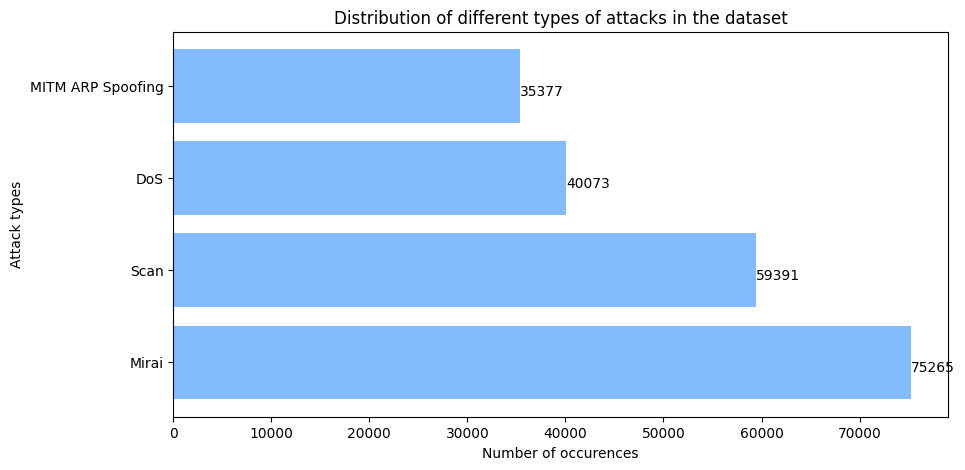

In [ ]:
plt.figure(figsize=(10,5))

attack = ('Mirai', 'Scan',  'DoS', 'MITM ARP Spoofing')
y_pos = np.arange(len(attack))
amount = data['Cat'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='#84bbff' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))

plt.show()

In [ ]:
group = {'Anomaly': 1,
                'Normal': 0}

data['Label_Num'] = dataset['Label'].map(lambda x: group[x])
data['Label_Num'].value_counts()

,count
Label_Num,
1,585342
0,40073


In [ ]:
group2 = {'Mirai': 1,
                'Scan': 2,
                'DoS': 3,
                'MITM ARP Spoofing': 4,
               'Normal' : 0}

data['Cat_Num'] = data['Cat'].map(lambda x: group2[x])
data['Cat_Num'].value_counts()

,count
Cat_Num,
1,415309
2,75265
3,59391
0,40073
4,35377


In [ ]:
group3 =        { 'Mirai-UDP Flooding' : 1,
                 'Mirai-Hostbruteforceg' : 2,
                 'DoS-Synflooding' : 3,
                 'Mirai-HTTP Flooding' : 4,
                 'Mirai-Ackflooding' : 5,
                 'Scan Port OS' : 6,
                 'MITM ARP Spoofing' : 7,
                 'Scan Hostport' : 8,
                 'Normal' : 0}

data['Sub_Cat_Num'] = data['Sub_Cat'].map(lambda x: group3[x])
data['Sub_Cat_Num'].value_counts()

,count
Sub_Cat_Num,
1,183189
2,121178
3,59391
4,55818
5,55124
6,53073
0,40073
7,35377
8,22192


In [ ]:
data

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat,Label_Num,Cat_Num,Sub_Cat_Num
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding,1,1,5
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding,1,3,3
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS,1,2,6
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg,1,1,2
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,277,1,1,18.0,18.0,18.0,18.0,18.0,0.000000,18.0,...,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding,1,1,1
625779,1658,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding,1,3,3
625780,77,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS,1,2,6
625781,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,0.000000,1388.0,...,120.0,7.071068,125.0,115.0,Normal,Normal,Normal,0,0,0


In [ ]:
#Label_Num = Label , Cat_Num = Cat , Sub_Cat_Num = Sub_Cat
data.drop(["Label","Cat","Sub_Cat"],axis=1,inplace=True)

In [ ]:
data

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Num,Cat_Num,Sub_Cat_Num
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1,1,5
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1,3,3
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1,2,6
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1,1,2
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,277,1,1,18.0,18.0,18.0,18.0,18.0,0.000000,18.0,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1,1,1
625779,1658,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,1,3,3
625780,77,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,1,2,6
625781,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,0.000000,1388.0,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,0,0,0


In [ ]:
data.to_csv("dataset_cleaned.csv", index = False)

In [ ]:
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
#data upload
df = pd.read_csv('dataset_cleaned.csv')
dataset = df.copy()
dataset.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Num,Cat_Num,Sub_Cat_Num
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1,1,5
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1,3,3
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1,2,6
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1,1,2
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1,1,2


In [ ]:
#divided by Lable_Num
x = dataset.iloc[:,:-3]
y = dataset.iloc[:,-3]

In [ ]:
print("Before oversampling: ",Counter(y))

Before oversampling:  Counter({1: 585342, 0: 40073})


In [ ]:
SMOTE = SMOTE()
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x, y)

In [ ]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({1: 585342, 0: 585342})


In [ ]:
X_train_SMOTE

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,75,1,1,982.000000,1430.0,982.00000,982.0,982.000000,0.000000,1430.0,...,1,0,0.0,0.0,0.0,0.0,75.000000,0.000000,75.000000,75.000000
1,5310,1,2,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0,0,0.0,0.0,0.0,0.0,2655.000000,2261.327486,4254.000000,1056.000000
2,141,0,3,0.000000,2806.0,0.00000,0.0,0.000000,0.000000,1388.0,...,0,0,0.0,0.0,0.0,0.0,70.500000,0.707107,71.000000,70.000000
3,151,0,2,0.000000,2776.0,0.00000,0.0,0.000000,0.000000,1388.0,...,0,0,0.0,0.0,0.0,0.0,151.000000,0.000000,151.000000,151.000000
4,153,2,1,886.000000,420.0,452.00000,434.0,443.000000,12.727922,420.0,...,2,0,0.0,0.0,0.0,0.0,76.500000,0.707107,77.000000,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170679,352,0,2,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0,0,0.0,0.0,0.0,0.0,352.000000,0.000000,352.000000,352.000000
1170680,270,2,1,1418.000000,1388.0,1388.00000,30.0,709.000000,960.251009,1388.0,...,2,0,0.0,0.0,0.0,0.0,135.000000,84.545153,194.782451,75.217549
1170681,475,3,1,2806.000000,1388.0,1388.00000,30.0,935.333333,784.041666,1388.0,...,3,0,0.0,0.0,0.0,0.0,158.333333,92.696069,261.889434,83.110566
1170682,259,2,1,3312.829768,1448.0,1356.34101,952.0,1221.560673,233.446391,1448.0,...,2,0,0.0,0.0,0.0,0.0,102.739607,23.191553,129.369593,86.979003


In [ ]:
test1 = pd.concat([X_train_SMOTE, y_train_SMOTE], axis=1)

In [ ]:
test1

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Num
0,75,1,1,982.000000,1430.0,982.00000,982.0,982.000000,0.000000,1430.0,...,0,0.0,0.0,0.0,0.0,75.000000,0.000000,75.000000,75.000000,1
1,5310,1,2,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,2655.000000,2261.327486,4254.000000,1056.000000,1
2,141,0,3,0.000000,2806.0,0.00000,0.0,0.000000,0.000000,1388.0,...,0,0.0,0.0,0.0,0.0,70.500000,0.707107,71.000000,70.000000,1
3,151,0,2,0.000000,2776.0,0.00000,0.0,0.000000,0.000000,1388.0,...,0,0.0,0.0,0.0,0.0,151.000000,0.000000,151.000000,151.000000,1
4,153,2,1,886.000000,420.0,452.00000,434.0,443.000000,12.727922,420.0,...,0,0.0,0.0,0.0,0.0,76.500000,0.707107,77.000000,76.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170679,352,0,2,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,352.000000,0.000000,352.000000,352.000000,0
1170680,270,2,1,1418.000000,1388.0,1388.00000,30.0,709.000000,960.251009,1388.0,...,0,0.0,0.0,0.0,0.0,135.000000,84.545153,194.782451,75.217549,0
1170681,475,3,1,2806.000000,1388.0,1388.00000,30.0,935.333333,784.041666,1388.0,...,0,0.0,0.0,0.0,0.0,158.333333,92.696069,261.889434,83.110566,0
1170682,259,2,1,3312.829768,1448.0,1356.34101,952.0,1221.560673,233.446391,1448.0,...,0,0.0,0.0,0.0,0.0,102.739607,23.191553,129.369593,86.979003,0


In [ ]:
test1.to_csv("Label_Num_Smote.csv", index = False)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from time import process_time

In [ ]:
dataset = pd.read_csv('dataset_cleaned.csv')
data = dataset.copy()

In [ ]:
def constant_feature_detect(data, threshold=0.9):
    quasi_constant_feature = []
    for feature in data.columns:
        predominant = (data[feature].value_counts() / float(len(data))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature), ' variables are found to be almost constant')
    return quasi_constant_feature

quasi_constant_feature = constant_feature_detect(data, threshold=0.9)
data.drop(quasi_constant_feature, axis=1, inplace=True)

26  variables are found to be almost constant


In [ ]:
quasi_constant_feature

['Fwd_Pkt_Len_Std',
 'Bwd_IAT_Std',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min',
 'Label_Num']

In [ ]:
data.drop(quasi_constant_feature,axis=1,inplace=True)

In [ ]:
# ===================== Split Features & Labels =====================
# NOTE: Use 'Label_Num' column as target
X = data.drop(columns=['Cat_Num', 'Sub_Cat_Num'])   # all features except labels
Y = dataset['Label_Num'].values.reshape(-1, 1) # Get Label_Num from the original dataset

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# ===================== Scaling =====================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (500332, 51)
Y_train shape: (500332, 1)


In [ ]:
input_dimension = X_train.shape[1]   # automatically set based on features

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, input_dim=input_dimension, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
t1_start = process_time()

history = model.fit(
    X_train, Y_train,
    batch_size=64,       # smaller batch size for stability
    epochs=20,           # more epochs since model is smaller
    validation_data=(X_test, Y_test),
    shuffle=True,
    verbose=1
)

t1_stop = process_time()
print("Training Time:", t1_stop - t1_start, "seconds")


Epoch 1/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.9713 - loss: 0.0917 - val_accuracy: 0.9858 - val_loss: 0.0458
Epoch 2/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9859 - loss: 0.0455 - val_accuracy: 0.9871 - val_loss: 0.0420
Epoch 3/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9877 - val_loss: 0.0407
Epoch 4/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9873 - loss: 0.0413 - val_accuracy: 0.9880 - val_loss: 0.0404
Epoch 5/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.9873 - loss: 0.0411 - val_accuracy: 0.9883 - val_loss: 0.0380
Epoch 6/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9881 - val_loss: 0.0386
Epoch 7/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.9885 - val_loss: 0.0375
Epoch 8/20
7818/7818 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9881 - loss: 0

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,861 (69.77 KB)

 Trainable params: 5,953 (23.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,908 (46.52 KB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/MyDrive/ids_ann.h5")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


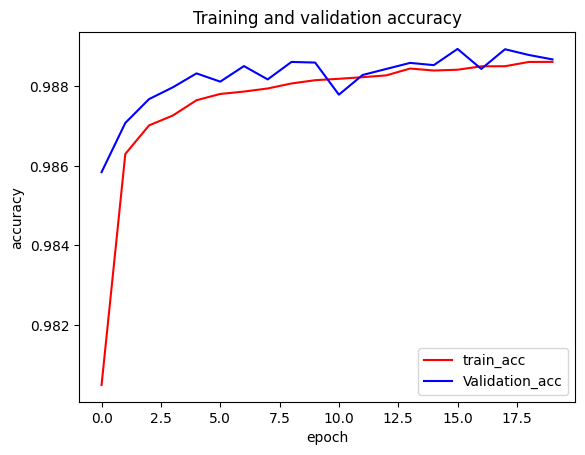

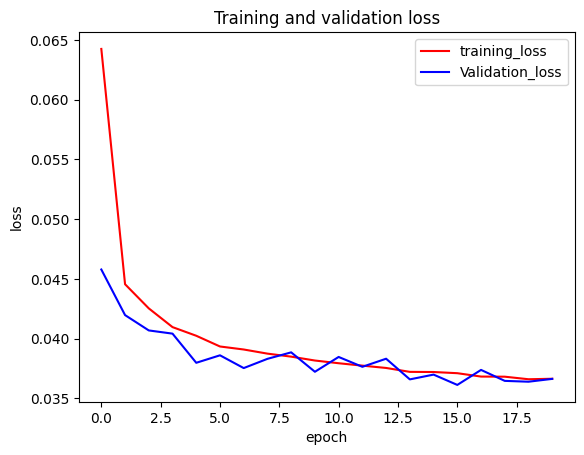

0.9886175394058228
0.988943338394165


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='train_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

print(np.max(history.history['accuracy']))
print(np.max(history.history['val_accuracy']))

In [ ]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    # np.set_printoptions(precision=2)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



    #Roc


def plot_roc_curve(Y_test, Y_pred, nb_classes, class_index, title='Receiver operating characteristic'):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(nb_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], Y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), Y_pred.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    #plt.figure()
    lw = 2
    plt.plot(fpr[class_index], tpr[class_index], color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[class_index])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    #epoch history

3909/3909 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
-----------------------------------------------------------------------------------------------------
Testing accuracy...
-----------------------------------------------------------------------------------------------------
0.9886795168008442
-----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      8089
           1       0.99      1.00      0.99    116994

    accuracy                           0.99    125083
   macro avg       0.99      0.92      0.95    125083
weighted avg       0.99      0.99      0.99    125083

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
TP: 116898 FP: 96 TN: 6769 FN: 1320
---------------------------------------------

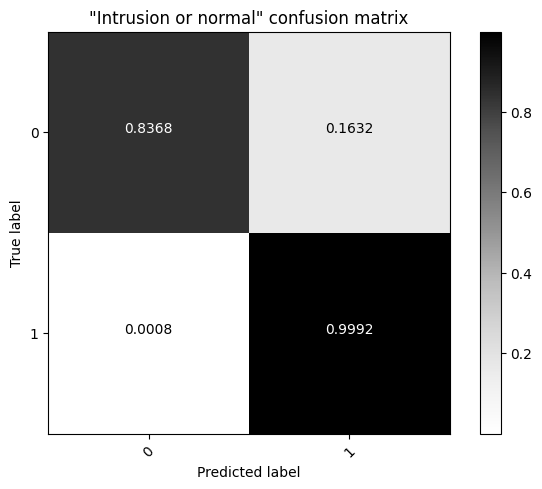

In [ ]:
Y_pred = model.predict(X_test);
print('-----------------------------------------------------------------------------------------------------')
print('Testing accuracy...')
print('-----------------------------------------------------------------------------------------------------')
score2 = accuracy_score(Y_test, np.around(Y_pred))
print(score2)
print('-----------------------------------------------------------------------------------------------------')
print(classification_report(Y_test, np.around(Y_pred)))
print('-----------------------------------------------------------------------------------------------------')

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)):
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)):
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

TP, FP, TN, FN = perf_measure(np.around(Y_pred), Y_test)

fp_rate = FP/(TN+FP)
tn_rate = TN/(TN+FP)

accuracy = (TN+TP)/(TN+FP+TP+TN)
precision = TP/(TN+FP)
hitrate = TP/(TN+FN)

print('-----------------------------------------------------------------------------------------------------')
print('TP:', TP, 'FP:', FP, 'TN:', TN, 'FN:', FN)
print('-----------------------------------------------------------------------------------------------------')
print('Accuracy:', accuracy)
print('-----------------------------------------------------------------------------------------------------')
print('False Positive rate:', fp_rate, 'True Negative Rate', tn_rate)

print('-----------------------------------------------------------------------------------------------------')

plot_confusion_matrix(Y_test, np.round(Y_pred), classes=list(range(2)),
                           normalize=True,
                         title='"Intrusion or normal" confusion matrix')